# Exo1: Principal Component Analitical

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = pd.read_csv('Data.csv')
data.head()

,f1,f2,f3,f4
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [2]:
data.shape
#permet de voir dimension des données initiales

(150, 4)

In [3]:
std = StandardScaler()
standard_data = std.fit_transform(data)
#la normalisation

In [15]:
pca = PCA (n_components = 2)
pca.fit (data)
principal_df = pca.transform (data)

In [5]:
principal_df.shape


(150, 2)

In [17]:
pca = pd.DataFrame(data = principal_df, columns=['PCA1', 'PCA2'])
pca.head ()


,PCA1,PCA2
0,-2.684126,0.319397
1,-2.714142,-0.177001
2,-2.888991,-0.144949
3,-2.745343,-0.318299
4,-2.728717,0.326755


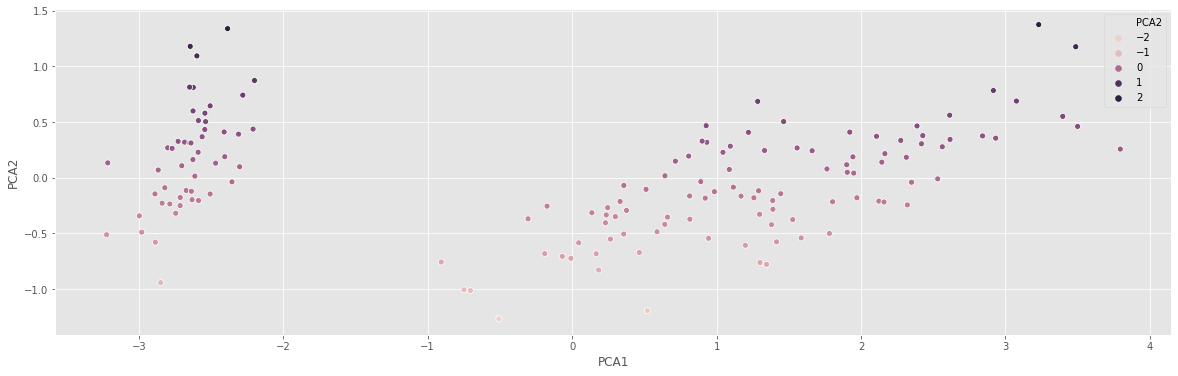

In [20]:
#Visualize our transformed data
plt.figure (figsize = (20, 6))
plt.style.use ('ggplot')
sns.scatterplot (data = pca, x = 'PCA1', y = 'PCA2', hue = 'PCA2')


# Exo2: Logistic Regression LR

In [21]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

data = pd.read_csv ('diabetes.csv')
data.head ()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
std = StandardScaler()
standard_data = std.fit_transform(data.iloc[:, :-1])
data.iloc[:, :-1] = standard_data
#la normalisation des données

In [23]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [24]:
x = data.drop ("Outcome", axis = 1)
y = data['Outcome']


In [25]:
x_test, x_train, y_test, y_train = train_test_split(x, y, test_size = 0.80, random_state = 0)
x_train.shape, x_test.shape, y_train.shape, y_test.shape


((615, 8), (153, 8), (615,), (153,))

In [26]:
model = LogisticRegression()
model.fit(x_train, y_train)

# Prédictions
y_pred = model.predict(x_test)
print(y_pred)

[1 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 1 1
 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0
 1 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0
 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0
 0 1 0 0 0]


In [28]:
# Matrice 
cf_matrix = confusion_matrix(y_test, y_pred)
print("matrix\n", cf_matrix)


matrix
 [[91 13]
 [21 28]]


Text(0.5, 33.0, 'Predicted values')

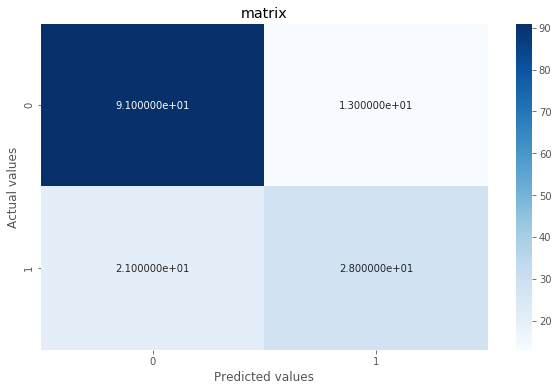

In [34]:
# Représentation de la matrice 
plt.figure (figsize = (10,6))
plt.title ("matrix")
sns.heatmap (cf_matrix, annot = True, cmap = 'Blues', fmt = 'e')
plt.ylabel ("Actual values")
plt.xlabel ("Predicted values")
